In [1]:
%%capture captured_output
# 实验环境已经预装了mindspore==2.4.10，如需更换mindspore版本，可更改下面 MINDSPORE_VERSION 变量
!pip uninstall mindspore -y
%env MINDSPORE_VERSION=2.4.10
!pip install https://ms-release.obs.cn-north-4.myhuaweicloud.com/${MINDSPORE_VERSION}/MindSpore/unified/x86_64/mindspore-${MINDSPORE_VERSION}-cp39-cp39-linux_x86_64.whl --trusted-host ms-release.obs.cn-north-4.myhuaweicloud.com -i https://pypi.tuna.tsinghua.edu.cn/simple

In [2]:
# 查看当前 mindspore 版本
!pip show mindspore

Name: mindspore
Version: 2.4.10
Summary: MindSpore is a new open source deep learning training/inference framework that could be used for mobile, edge and cloud scenarios.
Home-page: https://www.mindspore.cn
Author: The MindSpore Authors
Author-email: contact@mindspore.cn
License: Apache 2.0
Location: /home/nginx/miniconda/envs/jupyter/lib/python3.9/site-packages
Requires: asttokens, astunparse, numpy, packaging, pillow, protobuf, psutil, safetensors, scipy
Required-by: 


In [3]:
%%capture captured_output
# 安装 mindquantum, networkx
!pip install mindquantum==0.9.0 -i https://repo.huaweicloud.com/repository/pypi/simple/
!pip install networkx -i https://repo.huaweicloud.com/repository/pypi/simple/

# 编程实践：量子模拟器

In [4]:
# Numpy 是一个功能强大的Python库，主要用于对多维数组执行计算。
# Simulator 是模拟器，可以模拟量子计算机的计算过程。
import numpy as np                          # 导入numpy库并简写为np
from mindquantum.simulator import Simulator # 导入模拟器

# Simulator 中维护着一个量子态，初始为|0⟩态。
sim = Simulator('mqvector', 1)  # 实例化'mqvector'模拟器,量子比特数为1
print(sim)                      # 打印模拟器信息

/home/nginx/miniconda/envs/jupyter/lib/python3.9/site-packages/mindquantum/simulator/__init__.py:17: UserWarning: Disable mqvector gpu backend due to: Malloc GPU memory failed: cudaErrorInsufficientDriver, CUDA driver version is insufficient for CUDA runtime version
  from .available_simulator import SUPPORTED_SIMULATOR


mqvector simulator with 1 qubit (little endian), dtype: mindquantum.complex128.
Current quantum state:
1¦0⟩


In [5]:
# 通过 set_qs() 可以将量子态设置为任意的非零列向量，接口会自动进行归一化。
plus_state = np.array([1, 1])   # 构造¦+⟩态
sim.set_qs(plus_state)          # 将量子态设置为¦+⟩态

quantum_state = sim.get_qs()    # 获取当前量子态
ket = sim.get_qs(ket=True)      # 获取当前量子态的狄拉克符号形式
print('quantum state:', quantum_state)
print('ket:\n', ket)

quantum state: [0.70710678+0.j 0.70710678+0.j]
ket:
 √2/2¦0⟩
√2/2¦1⟩


# 编程实践：量子门

In [6]:
from mindquantum.core.gates import X, Y, H      # 导入量子门
from mindquantum.simulator import Simulator     # 导入模拟器

# 每个量子门都有 matrix() 方法，可以获取该量子门的矩阵形式。
print('Gate name:', X)
gateX = X.matrix()
print(gateX)

Gate name: X
[[0 1]
 [1 0]]


In [7]:
print('Gate name:', Y)
gateY = Y.matrix()
print(gateY)

Gate name: Y
[[ 0.+0.j -0.-1.j]
 [ 0.+1.j  0.+0.j]]


In [8]:
print('Gate name:', H)
gateH = H.matrix()
print(gateH)

Gate name: H
[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]


In [9]:
# 调用 Simulator 的 apply_gate() 接口可以将量子门作用在量子比特上，使量子态发生演化。
# on() 方法可以指定量子门作用在哪个量子比特上（目标比特），受哪些比特控制（控制比特）。
sim = Simulator('mqvector', 1)          # 实例化一个模拟器
sim.apply_gate(H.on(0))                 # 将H门作用于q0
print(sim)

mqvector simulator with 1 qubit (little endian), dtype: mindquantum.complex128.
Current quantum state:
√2/2¦0⟩
√2/2¦1⟩


# 编程实践：量子线路

In [10]:
from mindquantum.core.gates import X, Y, H   # 导入量子门X, Y, H
from mindquantum.core.circuit import Circuit # 导入Circuit模块，用于搭建量子线路
from mindquantum.simulator import Simulator  # 导入模拟器

# 通过“+=”的方式可以轻松地将量子门添加到量子线路中。
circ = Circuit() 			# 实例化一个量子线路
circ += H.on(0)  			# 在线路上的第0个比特添加一个H门
circ += Y.on(0) 			# 在线路上的第0个比特添加一个Y门
circ += X.on(1) 			# 在线路上的第1个比特添加一个X门

print(circ)

      ┏━━━┓ ┏━━━┓   
q0: ──┨ H ┠─┨ Y ┠───
      ┗━━━┛ ┗━━━┛   
      ┏━━━┓         
q1: ──┨╺╋╸┠─────────
      ┗━━━┛         


In [11]:
mat = circ.matrix() 		# 获取线路对应的矩阵
print('circuit matrix:\n', mat)

circuit matrix:
 [[0.+0.j         0.+0.j         0.-0.70710678j 0.+0.70710678j]
 [0.+0.j         0.+0.j         0.+0.70710678j 0.+0.70710678j]
 [0.-0.70710678j 0.+0.70710678j 0.+0.j         0.+0.j        ]
 [0.+0.70710678j 0.+0.70710678j 0.+0.j         0.+0.j        ]]


In [12]:
# 调用 Simulator 的 apply_circuit() 接口可以将量子线路作用在量子比特上，使量子态发生演化。
sim = Simulator('mqvector', 2)  	# 实例化一个两比特的模拟器
sim.apply_circuit(circ)          	# 作用量子线路
print(sim)

mqvector simulator with 2 qubits (little endian), dtype: mindquantum.complex128.
Current quantum state:
-√2/2j¦10⟩
√2/2j¦11⟩


# 编程实践：量子测量

In [13]:
from mindquantum.core.gates import Measure, H, X, Y # 导入量子门X, Y, H和量子测量Measure
from mindquantum.core.circuit import Circuit        # 导入Circuit模块，用于搭建量子线路
from mindquantum.simulator import Simulator         # 导入模拟器

circ = Circuit()                    # 实例化一个量子线路
circ += H.on(0)                     # 在线路上的第0个比特添加一个H门
circ += Y.on(0)                     # 在线路上的第0个比特添加一个Y门
circ += X.on(1)                     # 在线路上的第1个比特添加一个X门

# Measure 与量子门类似，可以用“+=”的方式添加到量子线路中，用 on() 方法指定目标比特。
circ += Measure().on(0)             # 在线路上的第0个比特添加一个测量
circ += Measure().on(1)             # 在线路上的第1个比特添加一个测量

print(circ)

      ┏━━━┓ ┏━━━┓ ┍━━━━━━┑   
q0: ──┨ H ┠─┨ Y ┠─┤ M q0 ├───
      ┗━━━┛ ┗━━━┛ ┕━━━━━━┙   
      ┏━━━┓ ┍━━━━━━┑         
q1: ──┨╺╋╸┠─┤ M q1 ├─────────
      ┗━━━┛ ┕━━━━━━┙         


In [14]:
# 调用 Simulator 的 sampling() 接口可以对某一线路的演化结果进行多次采样，获得量子测量的统计结果。
# 这一过程与真实量子计算机的运行方式相似。
sim = Simulator('mqvector', 2)              # 实例化一个两比特的模拟器
result = sim.sampling(circ, shots=1000) 	# 对该线路的演化结果进行1000次采样
print(result)

shots: 1000
Keys: q1 q0│0.00   0.128       0.257       0.385       0.513       0.641
───────────┼───────────┴───────────┴───────────┴───────────┴───────────┴
         10│▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓
           │
         11│▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒
           │
{'10': 513, '11': 487}


# 编程实践：量子近似优化算法

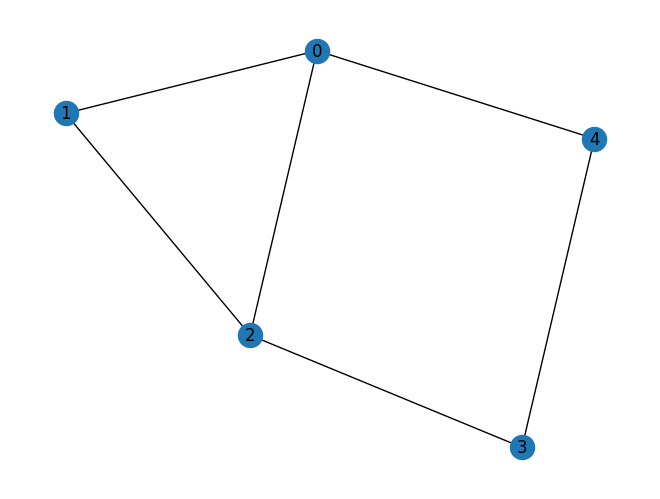

In [15]:
from mindquantum.algorithm import MaxCutAnsatz
from mindquantum.core.operators import Hamiltonian, QubitOperator
from mindquantum.framework import MQAnsatzOnlyLayer
import networkx as nx
import mindspore.nn as nn

# 构造待求解图
graph = nx.Graph([(0, 1), (1, 2), (2, 3), (3, 4), (0, 4), (0, 2)])
nx.draw(graph, with_labels=True)

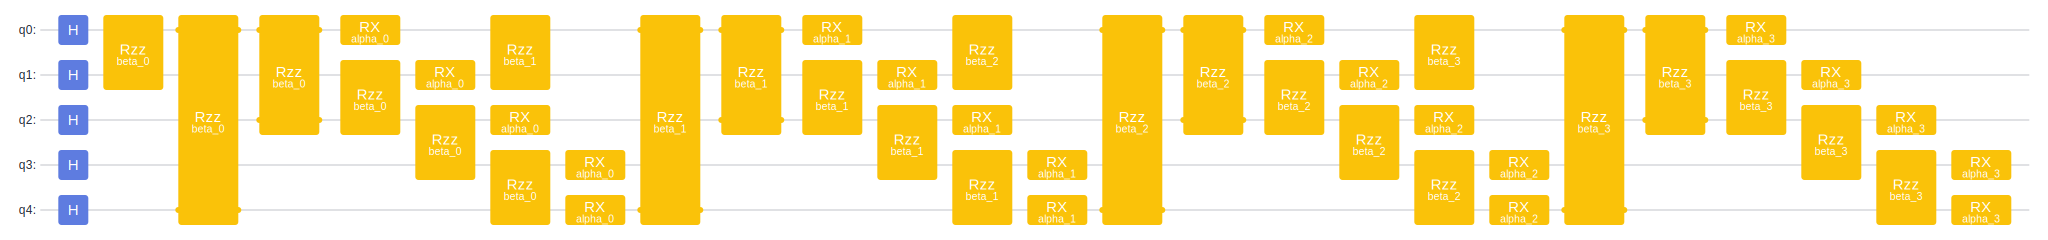

In [16]:
# 将图转化为目标哈密顿量
pauli_ops = QubitOperator()
for i in graph.edges:
    pauli_ops += QubitOperator(f'Z{i[0]} Z{i[1]}')
ham = Hamiltonian(pauli_ops)

# 构造线路
circ = MaxCutAnsatz(list(graph.edges), depth=4).circuit
circ.svg()

In [17]:
# 创建模拟器，backend使用‘mqvector’，能模拟5个比特（'circ'线路中包含的比特数）
sim = Simulator("mqvector", 5)

# 生成计算变分量子线路的期望值和梯度的算子
grad_ops = sim.get_expectation_with_grad(ham, circ)

# 生成待训练的神经网络
net = MQAnsatzOnlyLayer(grad_ops)

# 设置针对网络中所有可训练参数、学习率为0.05的Adam优化器
opti = nn.Adam(net.trainable_params(), learning_rate=0.05)

# 生成能对神经网络进行一步训练的算子
train_net = nn.TrainOneStepCell(net, opti)

for i in range(200):

    # 将神经网络训练一步并计算得到的结果（切割边数）。注意：每当'train_net()'运行一次，神经网络就训练了一步
    cut = (len(graph.edges) - train_net()) / 2

    # 每训练10步，打印当前训练步数和当前得到的切割边数
    if i % 10 == 0:
        print("train step:", i, ", cut:", cut)

train step: 0 , cut: [2.9977949]
train step: 10 , cut: [4.2281885]
train step: 20 , cut: [4.6647954]
train step: 30 , cut: [4.753826]
train step: 40 , cut: [4.825284]
train step: 50 , cut: [4.863241]
train step: 60 , cut: [4.878869]
train step: 70 , cut: [4.902153]
train step: 80 , cut: [4.9270267]
train step: 90 , cut: [4.9386244]
train step: 100 , cut: [4.937424]
train step: 110 , cut: [4.93911]
train step: 120 , cut: [4.9390526]
train step: 130 , cut: [4.9392242]
train step: 140 , cut: [4.9392376]
train step: 150 , cut: [4.9392524]
train step: 160 , cut: [4.9392548]
train step: 170 , cut: [4.9392567]
train step: 180 , cut: [4.939257]
train step: 190 , cut: [4.939257]
